<a href="https://colab.research.google.com/github/pedroblossbraga/Machine-Learning-with-Python/blob/main/K_Fold_Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Fold Cross-Validation

- It is a tecnique for avaluating a model's generalization capacity, given a dataset.
- In other words, it expresses the performance of a model, for diferent samples of data, and how your model performes in diverse "sub-datasets"
- This is a very useful way on fitting against overfitting (under-generalization of the model)

## Process Flow
![width=60](https://scikit-learn.org/stable/_images/grid_search_workflow.png)

<br>

- Optimal parameters can be found/estimated with hyperparameter tuning (e.g. Grid Search, Randomized Search, Bayesian Search, etc)

<br>

![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

## Formulation

For instance, given a sequence as a dataset: $\{ x_j \}_{j=1}^N$ of $N$ values.


Let $\mathcal{P}: \mathbb{R}^n \rightarrow \mathbb{R}$ the performance function.

The Cross-Validation performance $\mathcal{P}_{CV}$ can be computed by splitting the dataset into $K-1$ sub-samples:

\begin{equation}
\{x_j \}_{j=1}^{\frac{N}{K}}, \quad \{x_j \}_{j=\frac{N}{K}+1}^{\frac{2N}{K}}, \quad ... \quad \{x_j\}_{j=\frac{(K-1)N}{K}+1}^{N}
\end{equation}

computing the performance for each sub-sample and averaging. i.e.:

\begin{equation}
\mathcal{P}_{CV} = \frac{1}{K}\sum_{i=0}^{K-1} \mathcal{P}(\{x_j\}_{j=(\frac{iN}{K})+1}^{\frac{(i+1)N}{K}})
\end{equation}

- Data pre-processing (scaling) is another important method of regularization

## Links:
- https://scikit-learn.org/stable/modules/cross_validation.html


## Example

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm

## extrating sample data
X,y = datasets.load_iris(return_X_y=True)
## train-test-split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=0)

## defining a model and fitting it
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9666666666666667

In [2]:
from sklearn.model_selection import cross_val_score

clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [3]:
print("mean accuracy: %0.3f (+- %0.3f (standard deviation))" %(scores.mean(), scores.std()))

mean accuracy: 0.980 (+- 0.016 (standard deviation))


### Tip
- with **pipeline** it is very easy to implement cross validation together with data preprocessing, estimating the performance:

In [4]:
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
cross_val_score(clf, X, y, cv=cv)

array([0.97777778, 0.93333333, 0.95555556, 0.93333333, 0.97777778])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


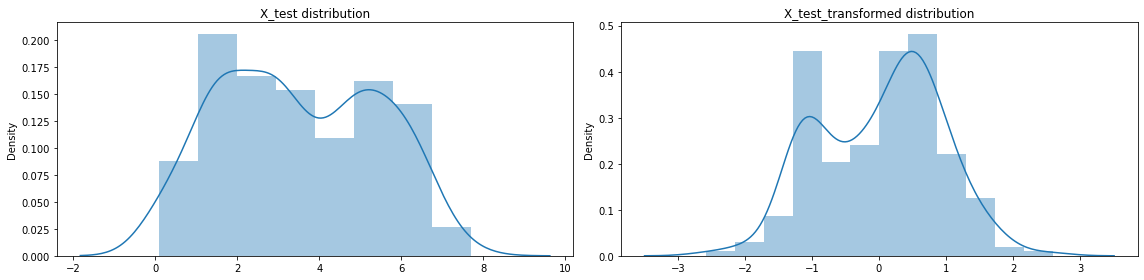

In [5]:
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=0)

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_transformed = scaler.transform(X_train)

clf = svm.SVC(C=1).fit(X_train_transformed, y_train)

X_test_transformed = scaler.transform(X_test)

## plotting the distributions
plt.figure(figsize=(16, 4))
plt.subplot(1,2,1)
plt.title('X_test distribution')
sns.distplot(X_test)

plt.subplot(1,2,2)
plt.title('X_test_transformed distribution')
sns.distplot(X_test_transformed)

plt.tight_layout()
plt.show()